# Assignment 6

In this assignment you have to do **EDA** on both or either of the datasets. You have been provided with two datasets ‘student-mat’ and ‘Attacks on Political Leaders in Pakistan’ respectively.

**Datasets**

1. Attacks on Political Leaders in Pakistan (Difficulty level - Low) - To get the details of the dataset visit this link (https://www.kaggle.com/zusmani/sacred-games)

2. student-mat (Difficulty level - High) - To get the details of the dataset visit this link (https://archive.ics.uci.edu/ml/datasets/student+performance)

# Load Data

In [54]:
import numpy as np
import pandas as pd

df = pd.read_csv('Attacks_on_Political_Leaders_in_Pakistan.csv',  encoding='latin1')
#Dropping Irrelevant columns
df = df.iloc[:,1:]

# 1. Data Wrangling 

In [55]:
df.head(5)

,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longititude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured
0,Liaqat Ali Khan,Tuesday,16-Oct-51,Working Day,Evening,Rawalpindi,"Company Bagh (Company Gardens), Rawalpindi",Park/Ground,Punjab,33.605800,73.043700,Target,Open,Alll India Muslim League,Killed,1,1
1,Khan abdul Jabbar Khan,Friday,9-May-58,Working Day,Morning,Lahore,"Sadullah Khan's house at 16 Aikman Road, GOR",Residence,Punjab,31.482635,74.071272,Target,Open,Chief Minister of West Pakistan,Killed,1,0
2,Hayyat Sherpao,Friday,8-Feb-85,Working Day,Evening,Peshawar,Campus of University of Peshawar,University,KPK,33.999533,71.425020,Target,Open,PPPP,Killed,1,0
3,Najeeb Ahmed,Friday,6-Apr-90,Working Day,After Noon,Karachi,North Nazimabad,Residence,Sindh,24.991800,66.991100,Target,Closed,Student wing of PPP,Killed,1,0
4,Azeem Ahmed Tariq,Saturday,1-May-93,Working Day,Morning,Karachi,near his house,Residence,Sindh,24.991800,66.991100,Target,Closed,MQM,Killed,1,0


**Fixing misspelled column name**

In [56]:
df.columns

Index(['Politician', 'Day', 'Date', 'Day Type', 'Time', 'City', 'Location',
       'Location Category', 'Province', 'Latitude', 'Longititude',
       'Target Category', 'Space (Open/Closed)', 'Party', 'Target Status',
       'Killed', 'Injured'],
      dtype='object')

In [57]:
lat_col = df.columns.values
lat_col[10] = 'Longitude'
df.columns = lat_col
df.columns

Index(['Politician', 'Day', 'Date', 'Day Type', 'Time', 'City', 'Location',
       'Location Category', 'Province', 'Latitude', 'Longitude',
       'Target Category', 'Space (Open/Closed)', 'Party', 'Target Status',
       'Killed', 'Injured'],
      dtype='object')

**How does the Data look?**

In [58]:
df.describe()

,Latitude,Longitude,Killed,Injured
count,51.000000,51.000000,51.000000,51.000000
mean,31.926578,70.493324,14.392157,34.352941
std,3.033316,2.356406,30.330894,83.868426
min,24.991800,65.524641,0.000000,0.000000
25%,30.209500,67.842450,1.000000,0.000000
50%,33.535100,71.425020,1.000000,4.000000
75%,33.999533,72.087269,14.000000,35.000000
max,35.234672,74.071272,149.000000,550.000000


Some details that are of interest here:

    34% of politicians in the dataset got injured in attackes and 14% got killed.

Our hypothesis is that locations is a predictor of survivability in attackes, so we have to do something with the loacations to get usefull insights.

**Missing Values**

In [59]:
df.isnull().sum()

Politician             0
Day                    0
Date                   0
Day Type               0
Time                   0
City                   0
Location               0
Location Category      3
Province               0
Latitude               0
Longitude              0
Target Category        0
Space (Open/Closed)    0
Party                  0
Target Status          0
Killed                 0
Injured                0
dtype: int64

In [60]:
df['Location Category'].unique()
# replace nan with most occuring InvestmentType value 
df['Location Category'].fillna(df['Location Category'].value_counts().idxmax(), inplace=True)

In [61]:
df.isnull().sum()

Politician             0
Day                    0
Date                   0
Day Type               0
Time                   0
City                   0
Location               0
Location Category      0
Province               0
Latitude               0
Longitude              0
Target Category        0
Space (Open/Closed)    0
Party                  0
Target Status          0
Killed                 0
Injured                0
dtype: int64

In [62]:
df['Location Category'].unique()

array(['Park/Ground', 'Residence', 'University', 'Details Missing',
       'Road', 'Government', 'Religious', 'UNKNOWN', 'Hotel', 'Market',
       'Transport', 'Office Building', 'Mobile', 'Funeral'], dtype=object)

In [63]:
#Replace NULL values in Location Category with UNKNOWN
df['Location Category'].fillna('UNKNOWN', inplace=True)

#Giving same values but with different text, the same text
df.loc[df['Location Category'] == 'Details Missing', 'Location Category'] = 'UNKNOWN'
df.loc[df['Province'] == 'Fata', 'Province'] = 'FATA'
df.loc[df['City'] == 'ATTOCK', 'City'] = 'Attock'

In [64]:
df

,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longitude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured
0,Liaqat Ali Khan,Tuesday,16-Oct-51,Working Day,Evening,Rawalpindi,"Company Bagh (Company Gardens), Rawalpindi",Park/Ground,Punjab,33.605800,73.043700,Target,Open,Alll India Muslim League,Killed,1,1
1,Khan abdul Jabbar Khan,Friday,9-May-58,Working Day,Morning,Lahore,"Sadullah Khan's house at 16 Aikman Road, GOR",Residence,Punjab,31.482635,74.071272,Target,Open,Chief Minister of West Pakistan,Killed,1,0
2,Hayyat Sherpao,Friday,8-Feb-85,Working Day,Evening,Peshawar,Campus of University of Peshawar,University,KPK,33.999533,71.425020,Target,Open,PPPP,Killed,1,0
3,Najeeb Ahmed,Friday,6-Apr-90,Working Day,After Noon,Karachi,North Nazimabad,Residence,Sindh,24.991800,66.991100,Target,Closed,Student wing of PPP,Killed,1,0
4,Azeem Ahmed Tariq,Saturday,1-May-93,Working Day,Morning,Karachi,near his house,Residence,Sindh,24.991800,66.991100,Target,Closed,MQM,Killed,1,0
5,Hakim Muhammad Said,Saturday,17-Oct-98,Working Day,After Noon,Karachi,Details Missing,UNKNOWN,Sindh,24.991800,66.991100,Target,Open,Independent,Killed,1,0
6,Maulana Azam Tariq,Monday,6-Oct-03,Working Day,Evening,Islamabad,"As his car drove into the capital, Islamabad",Road,Capital,33.718000,73.071800,Target,Open,Millat-i-Islamia,Killed,4,0
7,Pervez Musharaf,Monday,15-Dec-03,Working Day,Evening,Rawalpindi,A powerful bomb went off minutes after his hig...,Road,Punjab,33.605800,73.043700,Target,Open,All Pakistan Muslim League,Escaped,0,0
8,Pervez Musharaf,Thursday,25-Dec-03,Working Day,Evening,Rawalpindi,Attack on Musharaf's Rally,Road,Punjab,33.605800,73.043700,Suicide,Open,All Pakistan Muslim League,Escaped,16,4
9,Shaukat Aziz,Friday,30-Jul-04,Working Day,Night,Attock,Jaffar village in fateh jang,Park/Ground,Punjab,33.764500,72.366700,Suicide,Open,PMLQ,Escaped,7,70


In [65]:
#Convert Categorical variables to Category type
columns = ['Target Status', 'Day', 'Day Type', 'Time', 'City', 'Location Category',
          'Province', 'Target Category', 'Space (Open/Closed)', 'Party']
df[columns] = df[columns].astype('category')

In [66]:
df

,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longitude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured
0,Liaqat Ali Khan,Tuesday,16-Oct-51,Working Day,Evening,Rawalpindi,"Company Bagh (Company Gardens), Rawalpindi",Park/Ground,Punjab,33.605800,73.043700,Target,Open,Alll India Muslim League,Killed,1,1
1,Khan abdul Jabbar Khan,Friday,9-May-58,Working Day,Morning,Lahore,"Sadullah Khan's house at 16 Aikman Road, GOR",Residence,Punjab,31.482635,74.071272,Target,Open,Chief Minister of West Pakistan,Killed,1,0
2,Hayyat Sherpao,Friday,8-Feb-85,Working Day,Evening,Peshawar,Campus of University of Peshawar,University,KPK,33.999533,71.425020,Target,Open,PPPP,Killed,1,0
3,Najeeb Ahmed,Friday,6-Apr-90,Working Day,After Noon,Karachi,North Nazimabad,Residence,Sindh,24.991800,66.991100,Target,Closed,Student wing of PPP,Killed,1,0
4,Azeem Ahmed Tariq,Saturday,1-May-93,Working Day,Morning,Karachi,near his house,Residence,Sindh,24.991800,66.991100,Target,Closed,MQM,Killed,1,0
5,Hakim Muhammad Said,Saturday,17-Oct-98,Working Day,After Noon,Karachi,Details Missing,UNKNOWN,Sindh,24.991800,66.991100,Target,Open,Independent,Killed,1,0
6,Maulana Azam Tariq,Monday,6-Oct-03,Working Day,Evening,Islamabad,"As his car drove into the capital, Islamabad",Road,Capital,33.718000,73.071800,Target,Open,Millat-i-Islamia,Killed,4,0
7,Pervez Musharaf,Monday,15-Dec-03,Working Day,Evening,Rawalpindi,A powerful bomb went off minutes after his hig...,Road,Punjab,33.605800,73.043700,Target,Open,All Pakistan Muslim League,Escaped,0,0
8,Pervez Musharaf,Thursday,25-Dec-03,Working Day,Evening,Rawalpindi,Attack on Musharaf's Rally,Road,Punjab,33.605800,73.043700,Suicide,Open,All Pakistan Muslim League,Escaped,16,4
9,Shaukat Aziz,Friday,30-Jul-04,Working Day,Night,Attock,Jaffar village in fateh jang,Park/Ground,Punjab,33.764500,72.366700,Suicide,Open,PMLQ,Escaped,7,70


**Column splits/transformations**

In [67]:
df.dtypes

Politician               object
Day                    category
Date                     object
Day Type               category
Time                   category
City                   category
Location                 object
Location Category      category
Province               category
Latitude                float64
Longitude               float64
Target Category        category
Space (Open/Closed)    category
Party                  category
Target Status          category
Killed                    int64
Injured                   int64
dtype: object

In [68]:
#Get Month and Year of Attack
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year

#correct wrong interpretation of data
df['year']=df['year'].replace(2051, 1951)
df['year']=df['year'].replace(2058, 1958)

df.head(5)

,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longitude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured,month,year
0,Liaqat Ali Khan,Tuesday,16-Oct-51,Working Day,Evening,Rawalpindi,"Company Bagh (Company Gardens), Rawalpindi",Park/Ground,Punjab,33.605800,73.043700,Target,Open,Alll India Muslim League,Killed,1,1,10,1951
1,Khan abdul Jabbar Khan,Friday,9-May-58,Working Day,Morning,Lahore,"Sadullah Khan's house at 16 Aikman Road, GOR",Residence,Punjab,31.482635,74.071272,Target,Open,Chief Minister of West Pakistan,Killed,1,0,5,1958
2,Hayyat Sherpao,Friday,8-Feb-85,Working Day,Evening,Peshawar,Campus of University of Peshawar,University,KPK,33.999533,71.425020,Target,Open,PPPP,Killed,1,0,2,1985
3,Najeeb Ahmed,Friday,6-Apr-90,Working Day,After Noon,Karachi,North Nazimabad,Residence,Sindh,24.991800,66.991100,Target,Closed,Student wing of PPP,Killed,1,0,4,1990
4,Azeem Ahmed Tariq,Saturday,1-May-93,Working Day,Morning,Karachi,near his house,Residence,Sindh,24.991800,66.991100,Target,Closed,MQM,Killed,1,0,5,1993


In [69]:
df.describe()

,Latitude,Longitude,Killed,Injured,month,year
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,31.926578,70.493324,14.392157,34.352941,6.745098,2006.862745
std,3.033316,2.356406,30.330894,83.868426,3.621288,12.563470
min,24.991800,65.524641,0.000000,0.000000,1.000000,1951.000000
25%,30.209500,67.842450,1.000000,0.000000,4.000000,2007.000000
50%,33.535100,71.425020,1.000000,4.000000,7.000000,2010.000000
75%,33.999533,72.087269,14.000000,35.000000,10.000000,2013.000000
max,35.234672,74.071272,149.000000,550.000000,12.000000,2018.000000


In [70]:
df['Target Category'].value_counts()

Suicide    27
Target     24
Name: Target Category, dtype: int64

In [71]:
df['Target Status'].value_counts()

Killed     31
Escaped    20
Name: Target Status, dtype: int64

In [72]:
df['Space (Open/Closed)'].value_counts()

Open      36
Closed    15
Name: Space (Open/Closed), dtype: int64

<hr /><hr />

# Feature Engineering 1

In [73]:
df['Target Attack'] = (df['Target Category'] == 'Target').astype(int)
df['Suicide Attack'] = (df['Target Category'] != 'Target').astype(int)
df['Open Space'] = (df['Space (Open/Closed)'] == 'Open').astype(int)
df['Closed Space'] = (df['Space (Open/Closed)'] != 'Open').astype(int)
df['Politician Killed'] = (df['Target Status'] == 'Killed').astype(int)
df['Politician Escaped'] = (df['Target Status'] != 'Killed').astype(int)

In [74]:
df.head()

,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,...,Killed,Injured,month,year,Target Attack,Suicide Attack,Open Space,Closed Space,Politician Killed,Politician Escaped
0,Liaqat Ali Khan,Tuesday,16-Oct-51,Working Day,Evening,Rawalpindi,"Company Bagh (Company Gardens), Rawalpindi",Park/Ground,Punjab,33.605800,...,1,1,10,1951,1,0,1,0,1,0
1,Khan abdul Jabbar Khan,Friday,9-May-58,Working Day,Morning,Lahore,"Sadullah Khan's house at 16 Aikman Road, GOR",Residence,Punjab,31.482635,...,1,0,5,1958,1,0,1,0,1,0
2,Hayyat Sherpao,Friday,8-Feb-85,Working Day,Evening,Peshawar,Campus of University of Peshawar,University,KPK,33.999533,...,1,0,2,1985,1,0,1,0,1,0
3,Najeeb Ahmed,Friday,6-Apr-90,Working Day,After Noon,Karachi,North Nazimabad,Residence,Sindh,24.991800,...,1,0,4,1990,1,0,0,1,1,0
4,Azeem Ahmed Tariq,Saturday,1-May-93,Working Day,Morning,Karachi,near his house,Residence,Sindh,24.991800,...,1,0,5,1993,1,0,0,1,1,0


In [75]:
#matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 2. Visualization 

**On which day does most attacks happen?**

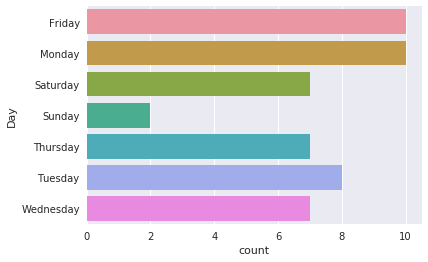

In [76]:
sns.countplot(y='Day', data=df)

**At What time does most Attacks happen?**

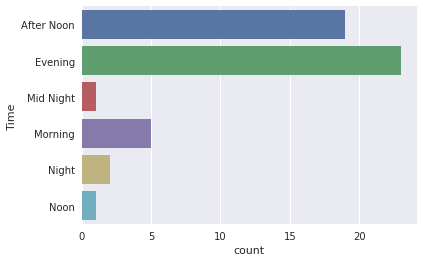

In [77]:
sns.countplot(y='Time', data = df)

**Which City suffered most attack?**

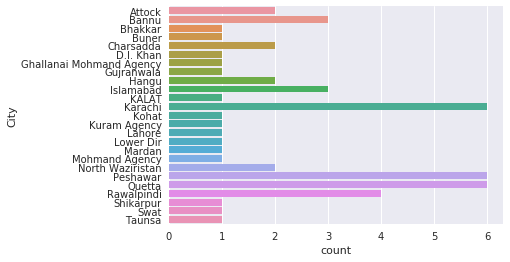

In [78]:
sns.countplot(y='City', data = df)

**Attack rate on Province**

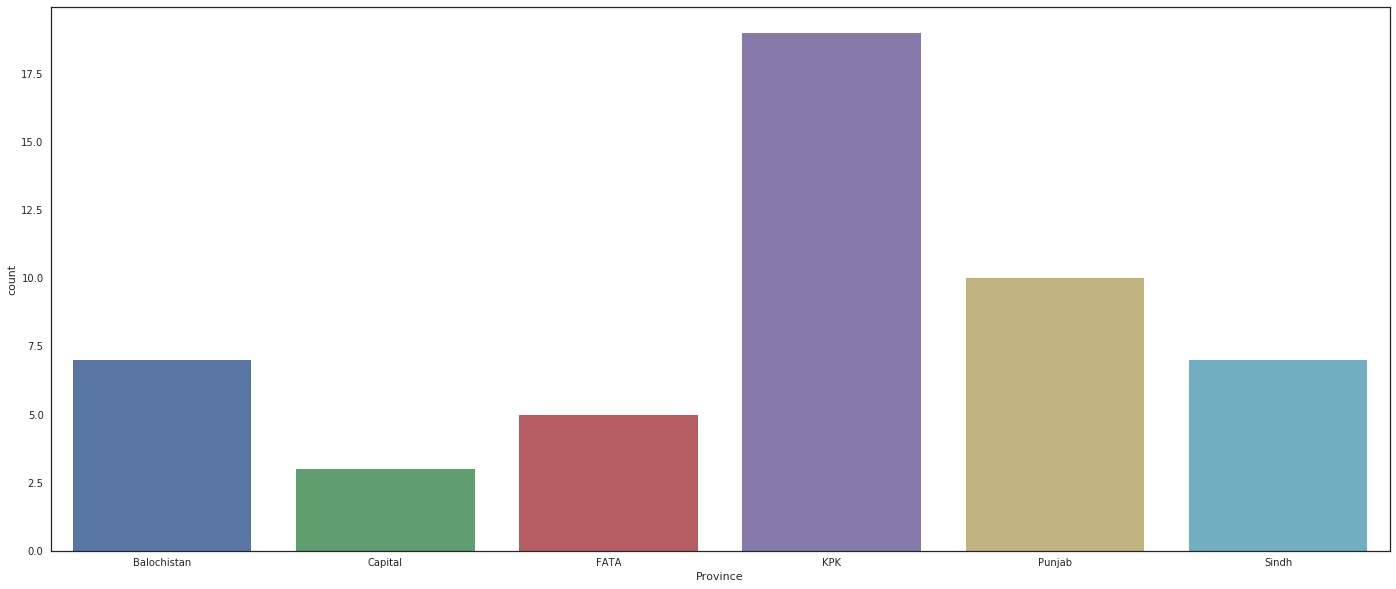

In [118]:
sns.countplot(x='Province', data = df)

**Which location is most vulnerable** 

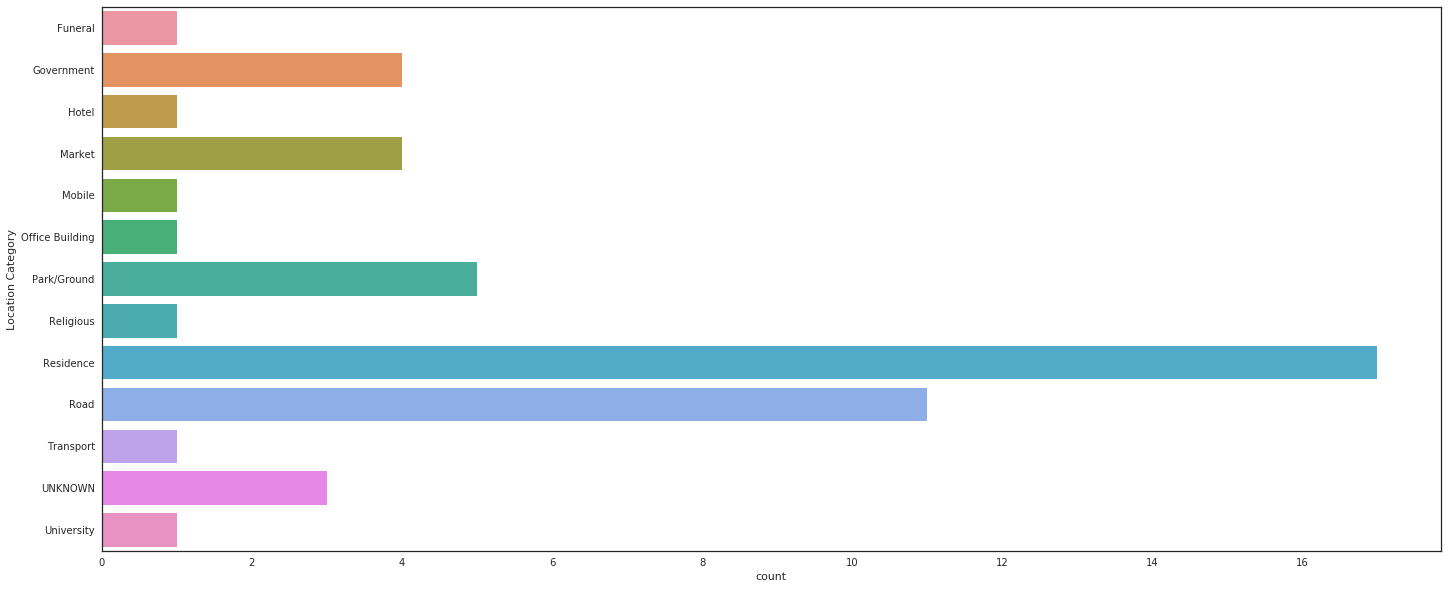

In [119]:
sns.countplot(y='Location Category', data = df)

**Which Political party suffers most attackes**

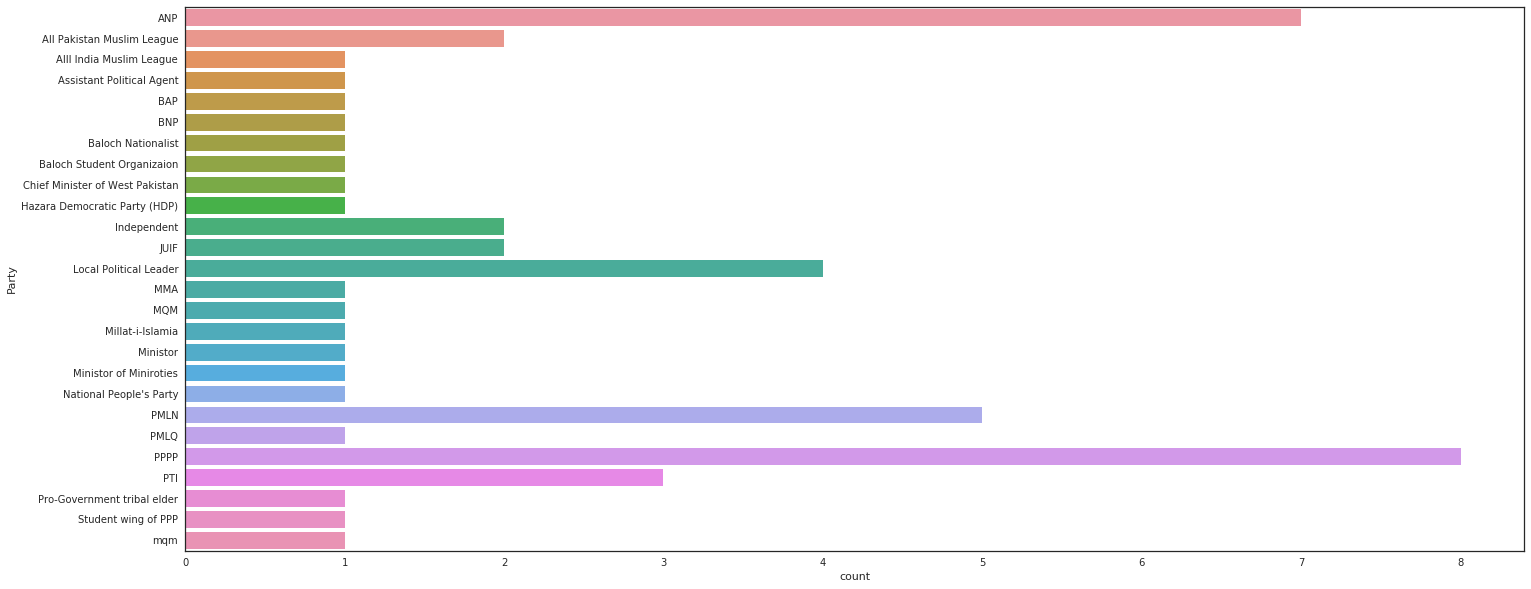

In [120]:
sns.countplot(y='Party', data = df)

# 3. Insights

## **Analysis on Province**

### 1. Let's first check out Total Casualty Rate in each Province

In [144]:
new = df.groupby(['Province'])['Killed', 'Injured'].sum().reset_index()
new

,Province,Killed,Injured
0,Balochistan,164,204
1,Capital,6,0
2,FATA,116,234
3,KPK,196,472
4,Punjab,101,290
5,Sindh,151,552


Text(0.5,1,'Total Casualty Rate By Province')

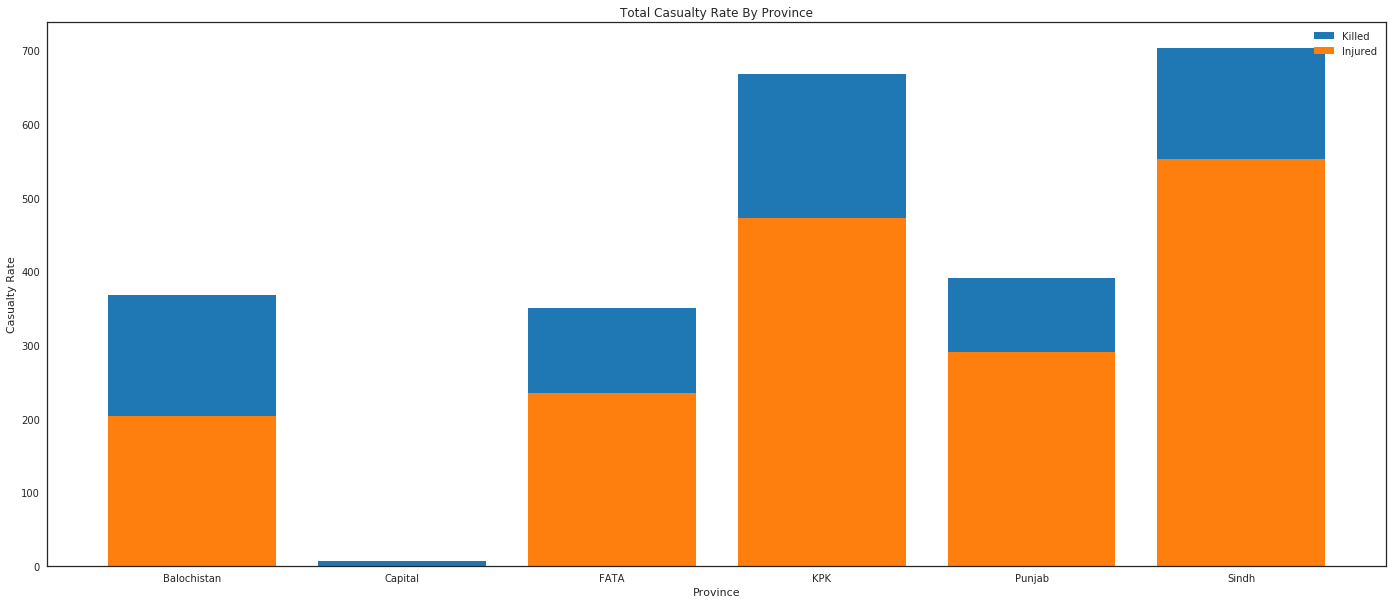

In [145]:
plt.bar(new.Province, new.Killed, label='Killed', color='#1f77b4',bottom=new.Injured)
plt.bar(new.Province, new.Injured, label='Injured', color='#ff7f0e')

plt.xticks(new.Province)
plt.ylabel("Casualty Rate")
plt.xlabel("Province")
plt.legend(loc="upper right")
plt.title("Total Casualty Rate By Province")

### 2. Let's see which Province has more Politician Casualty Rate

In [146]:
new = df.groupby(['Province'])['Politician Killed', 'Politician Escaped'].sum().reset_index()
new

,Province,Politician Killed,Politician Escaped
0,Balochistan,5,2
1,Capital,3,0
2,FATA,3,2
3,KPK,10,9
4,Punjab,5,5
5,Sindh,5,2


Text(0.5,1,'Politician Casualty Rate By Province')

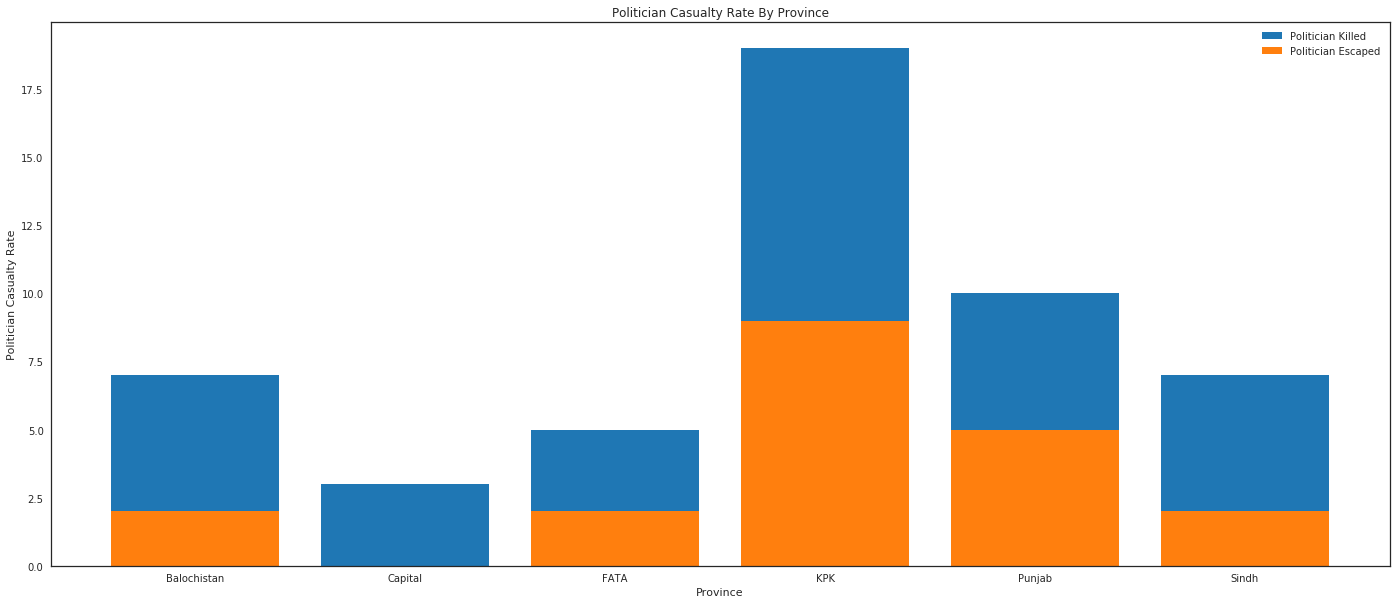

In [147]:
plt.bar(new.Province, new['Politician Killed'], label='Politician Killed', color='#1f77b4',bottom=new['Politician Escaped'])
plt.bar(new.Province, new['Politician Escaped'], label='Politician Escaped', color='#ff7f0e')

plt.xticks(new.Province)
plt.ylabel("Politician Casualty Rate")
plt.xlabel("Province")
plt.legend(loc="upper right")
plt.title("Politician Casualty Rate By Province")

### 3. What kind of Attack has more tendency to occur in each Province?

In [152]:
new = df.groupby(['Province'])['Target Attack', 'Suicide Attack'].sum().reset_index()
new

,Province,Target Attack,Suicide Attack
0,Balochistan,4,3
1,Capital,3,0
2,FATA,0,5
3,KPK,8,11
4,Punjab,4,6
5,Sindh,5,2


Text(0.5,1,'Suicide Attack vs Target Attack By Province')

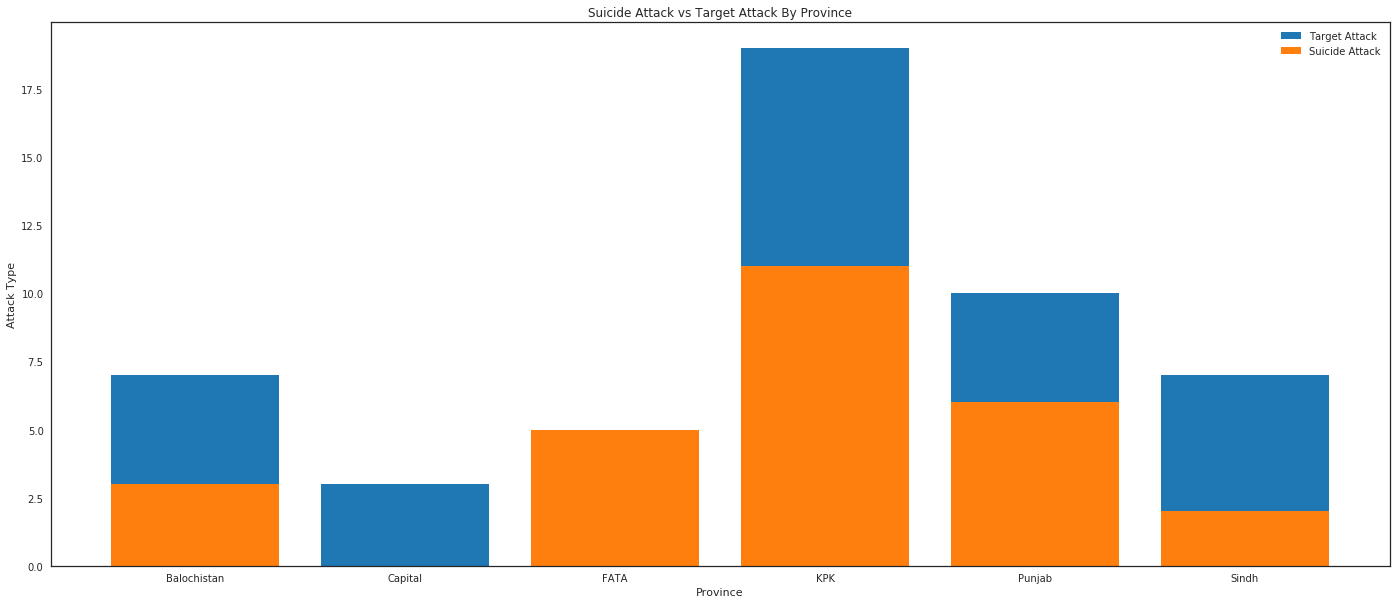

In [156]:
plt.bar(new.Province, new['Target Attack'], label='Target Attack', color='#1f77b4',bottom=new['Suicide Attack'])
plt.bar(new.Province, new['Suicide Attack'], label='Suicide Attack', color='#ff7f0e')

plt.xticks(new.Province)
plt.ylabel("Attack Type")
plt.xlabel("Province")
plt.legend(loc="upper right")
plt.title("Suicide Attack vs Target Attack By Province")

### 4. Does more Attacks happened in Open or Closed Space?

In [157]:
new = df.groupby(['Province'])['Open Space', 'Closed Space'].sum().reset_index()
new

,Province,Open Space,Closed Space
0,Balochistan,6,1
1,Capital,2,1
2,FATA,2,3
3,KPK,14,5
4,Punjab,8,2
5,Sindh,4,3


Text(0.5,1,'Open/Closed Space Attacks By Province')

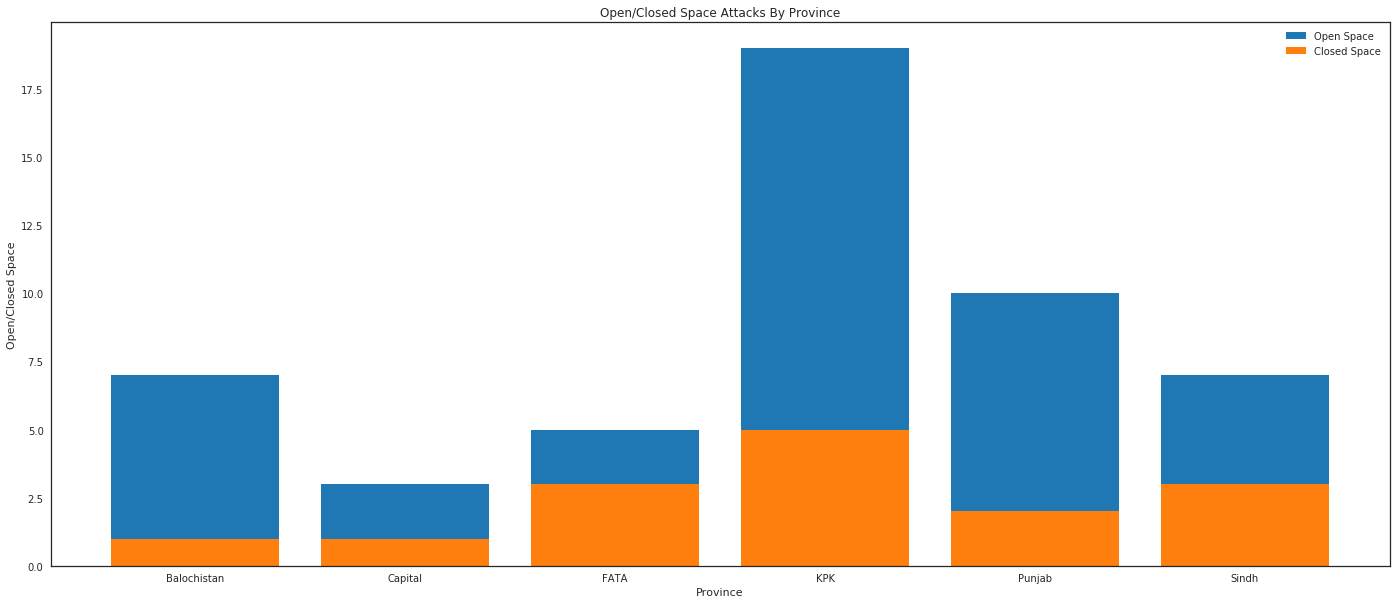

In [158]:
plt.bar(new.Province, new['Open Space'], label='Open Space', color='#1f77b4',bottom=new['Closed Space'])
plt.bar(new.Province, new['Closed Space'], label='Closed Space', color='#ff7f0e')

plt.xticks(new.Province)
plt.ylabel("Open/Closed Space")
plt.xlabel("Province")
plt.legend(loc="upper right")
plt.title("Open/Closed Space Attacks By Province")

### 5. What day has more casualty rate in each Province?

In [176]:
new = df.groupby(['Day Type'])['Killed', 'Injured'].sum().reset_index()
new

,Day Type,Killed,Injured
0,Holiday,25,49
1,Working Day,709,1703


Text(0.5,1,'Total Casualty Rate By Province')

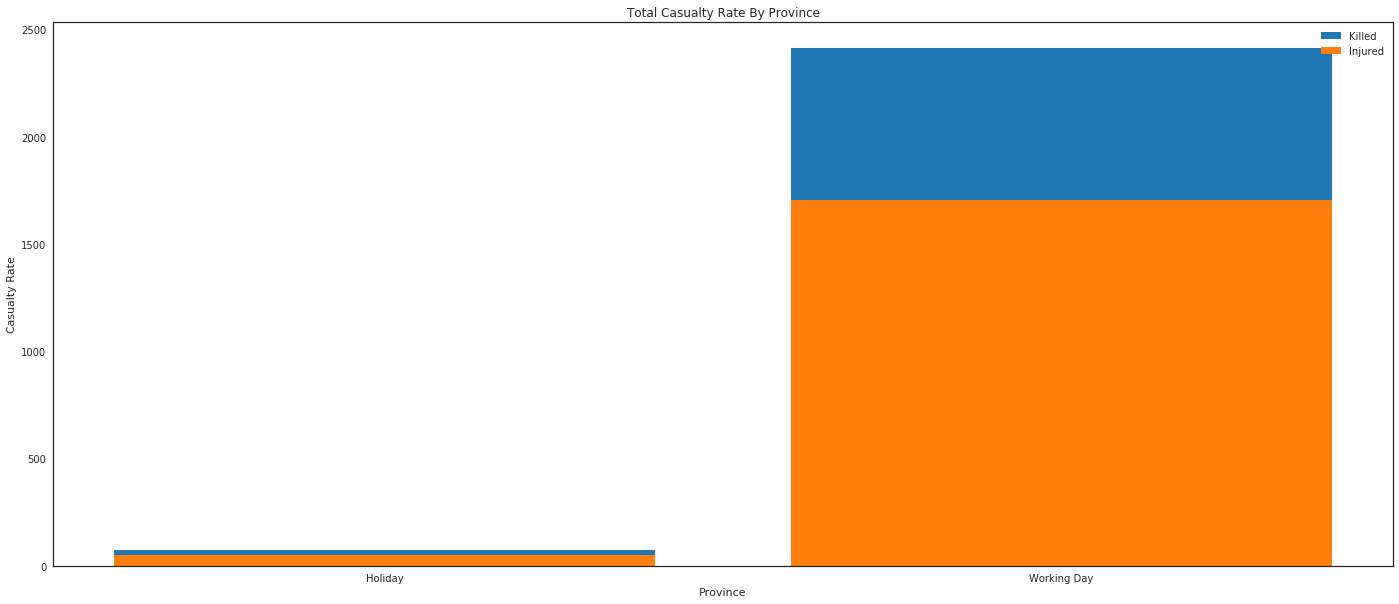

In [177]:
plt.bar(new['Day Type'], new.Killed, label='Killed', color='#1f77b4',bottom=new.Injured)
plt.bar(new['Day Type'], new.Injured, label='Injured', color='#ff7f0e')

plt.xticks(new['Day Type'])
plt.ylabel("Casualty Rate")
plt.xlabel("Province")
plt.legend(loc="upper right")
plt.title("Total Casualty Rate By Province")

In [163]:
new = df.groupby(['Day'])['Killed', 'Injured'].sum().reset_index()
new

,Day,Killed,Injured
0,Friday,170,271
1,Monday,152,340
2,Saturday,112,228
3,Sunday,20,42
4,Thursday,206,633
5,Tuesday,55,178
6,Wednesday,19,60


Text(0.5,1,'Total Casualty Rate By Province')

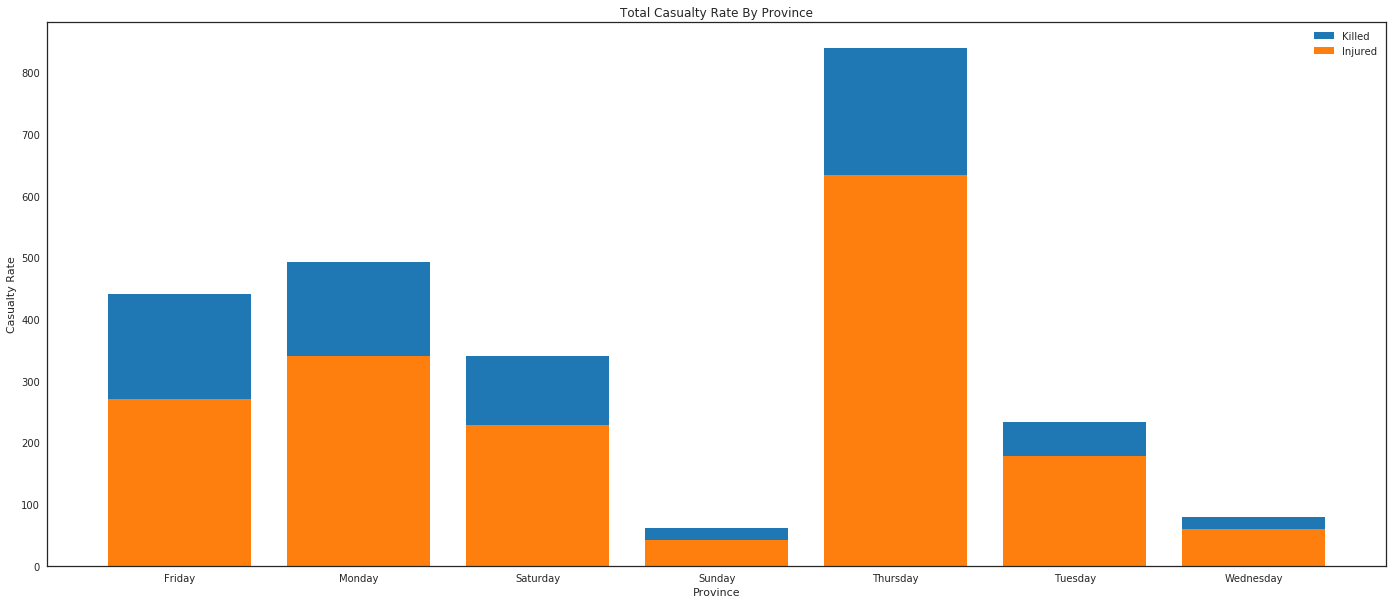

In [164]:
plt.bar(new.Day, new.Killed, label='Killed', color='#1f77b4',bottom=new.Injured)
plt.bar(new.Day, new.Injured, label='Injured', color='#ff7f0e')

plt.xticks(new.Day)
plt.ylabel("Casualty Rate")
plt.xlabel("Province")
plt.legend(loc="upper right")
plt.title("Total Casualty Rate By Province")

### 6. What time of day has more casualty rate in each Province?

In [179]:
new = df.groupby(['Province', 'Day Type'])['Killed', 'Injured'].sum().reset_index()
new

,Province,Day Type,Killed,Injured
0,Balochistan,Holiday,NaN,NaN
1,Balochistan,Working Day,164.0,204.0
2,Capital,Holiday,NaN,NaN
3,Capital,Working Day,6.0,0.0
4,FATA,Holiday,NaN,NaN
5,FATA,Working Day,116.0,234.0
6,KPK,Holiday,5.0,22.0
7,KPK,Working Day,191.0,450.0
8,Punjab,Holiday,19.0,25.0
9,Punjab,Working Day,82.0,265.0


In [186]:
pd.crosstab(index=new['Day Type'],columns=new.Province, values=new.Killed, aggfunc='sum', margins=True)

Province,Balochistan,Capital,FATA,KPK,Punjab,Sindh,All
Day Type,,,,,,,
Holiday,0.0,0.0,0.0,5.0,19.0,1.0,25.0
Working Day,164.0,6.0,116.0,191.0,82.0,150.0,709.0
All,164.0,6.0,116.0,196.0,101.0,151.0,734.0


In [182]:
plt

plt.bar([new.Province,new['Day Type'], new.Killed, label='Killed', color='#1f77b4',bottom=new.Injured)
plt.bar([new.Province,new['Day Type'], new.Injured, label='Injured', color='#ff7f0e')

plt.xticks(new.Day)
plt.ylabel("Casualty Rate")
plt.xlabel("Province")
plt.legend(loc="upper right")
plt.title("Total Casualty Rate By Province")

SyntaxError: invalid syntax (<ipython-input-182-983054927094>, line 1)